In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

In [2]:
# Read in the image
image = cv2.imread('C:\\Users\\Vishaal\\Desktop\\Spring 20\\Machine Learning\\Kaggle\\ids705sp2020\\training\\2.tif')

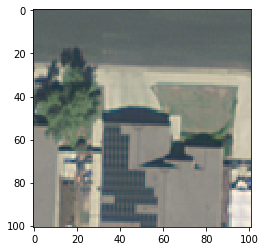

In [3]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

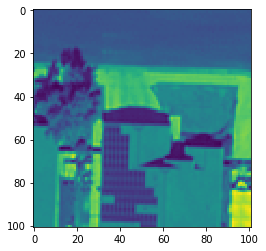

In [4]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

plt.imshow(gray)

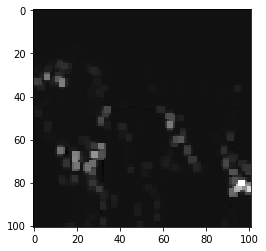

In [5]:
# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

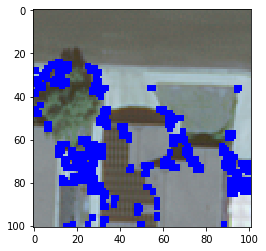

In [6]:
# Threshold for an optimal value, it may vary depending on the image.
image[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(image)

In [7]:
image = cv2.imread('C:\\Users\\Vishaal\\Desktop\\Spring 20\\Machine Learning\\Kaggle\\ids705sp2020\\training\\2.tif')
#Subpixel accuracy using cv2
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

In [8]:
len(dst[75])

101

In [9]:
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

In [10]:
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
image[res[:,1],res[:,0]]=[0,0,255]
image[res[:,3],res[:,2]] = [0,255,0]

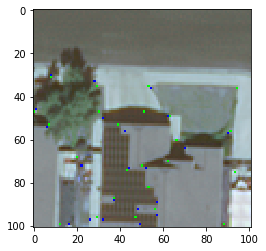

In [11]:
plt.imshow(image)

In [103]:
label_train = pd.read_csv('C:\\Users\\Vishaal\\Desktop\\Spring 20\\Machine Learning\\Kaggle\\ids705sp2020\\labels_training.csv')
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(label_train.id, label_train.label, test_size=0.25, random_state=0)

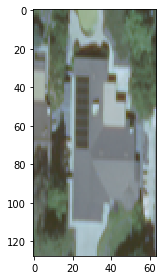

In [105]:
l = []

for i in range (0, 1125):
    img = cv2.imread('C:\\Users\\Vishaal\\Desktop\\Spring 20\\Machine Learning\\Kaggle\\ids705sp2020\\training\\'+str(i)+'.tif')
    resized_img = resize(img, (128,64)) 
    imshow(resized_img) 
    
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(4, 4), visualize=True, multichannel=True)
    
    l.append(fd)
    
    
   


In [114]:
l = np.asarray(l)

l = l.transpose()
l.shape

(1125, 9360)

In [115]:
label_train = pd.read_csv('C:\\Users\\Vishaal\\Desktop\\Spring 20\\Machine Learning\\Kaggle\\ids705sp2020\\labels_training.csv')
label_train = label_train.iloc[0:1125, 1]

In [116]:
len(label_train)

1125

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
logisticRegr = LogisticRegression()
logisticRegr.fit(l, label_train)

C:\Users\Vishaal\Anaconda3_Mod\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
predict = logisticRegr.predict(l)

In [124]:
score = logisticRegr.score(l, label_train)
score

0.9937777777777778

In [14]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(4, 4), visualize=True, multichannel=True)

In [91]:
len(fd)

9360

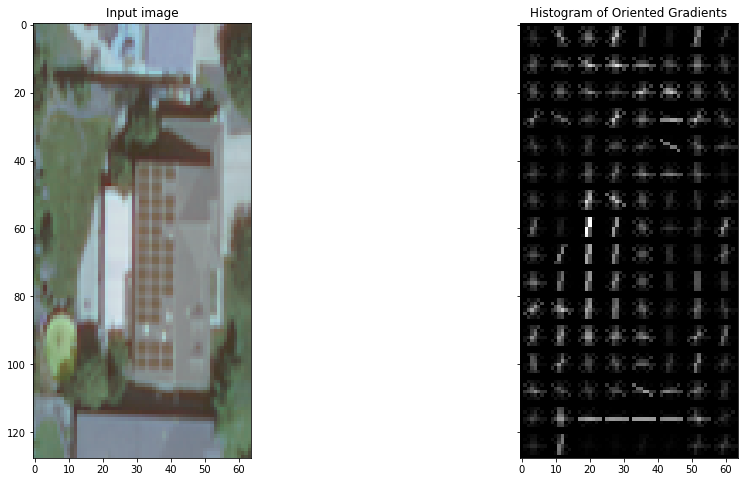

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [17]:
fd.shape

(9360,)